In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator as Calculator
%matplotlib inline



In [49]:
#Data Cleaning
data = pd.read_excel("inputdata.xlsx")
data['EC_value'], data['EC_error'] = zip(*data['ELE_COD'].map(lambda x: x.split('±')))
data.head()

,NUM,A,B,MOLFRC_A,T,P,ELE_COD,EC_value,EC_error
0,1,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,298.15,101,1.166 ± 0.058,1.166,0.058
1,2,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,299.15,101,1.203 ± 0.06,1.203,0.06
2,3,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,300.15,101,1.242 ± 0.062,1.242,0.062
3,4,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,301.15,101,1.271 ± 0.064,1.271,0.064
4,5,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,302.15,101,1.289 ± 0.064,1.289,0.064


In [50]:
#Setting up for molecular descriptors
n = data.shape[0]
list_of_descriptors = ['NumHeteroatoms','MolWt','ExactMolWt','NOCount','NumHDonors','RingCount','NumAromaticRings','NumSaturatedRings','NumAliphaticRings']
calc = Calculator(list_of_descriptors)
D = len(list_of_descriptors)
d = len(list_of_descriptors)*2 + 4
print(n,d)

2523 22


In [51]:
#setting up the x and y matrices
X = np.zeros((n,d))
X[:,-3] = data['T']
X[:,-2] = data['P']
X[:,-1] = data['MOLFRC_A']

print(X[:,0])
for i in range(n):
    A = Chem.MolFromSmiles(data['A'][i])
    B = Chem.MolFromSmiles(data['B'][i])
    X[i][:D]    = calc.CalcDescriptors(A)
    X[i][D:2*D] = calc.CalcDescriptors(B)
print(data['NUM'].shape,X.shape)    

new_data = pd.DataFrame(X,columns=['NUM','NumHeteroatoms_A','MolWt_A','ExactMolWt_A','NOCount_A','NumHDonors_A','RingCount_A','NumAromaticRings_A','NumSaturatedRings_A','NumAliphaticRings_A','NumHeteroatoms_B','MolWt_B','ExactMolWt_B','NOCount_B','NumHDonors_B','RingCount_B','NumAromaticRings_B','NumSaturatedRings_B','NumAliphaticRings_B','T','P','MOLFRC_A'])

print(new_data)

y = data['EC_value']



[ 0.  0.  0. ...,  0.  0.  0.]
(2523,) (2523, 22)
      NUM  NumHeteroatoms_A     MolWt_A  ExactMolWt_A  NOCount_A  \
0     6.0           234.321  234.103813           5.0        0.0   
1     6.0           234.321  234.103813           5.0        0.0   
2     6.0           234.321  234.103813           5.0        0.0   
3     6.0           234.321  234.103813           5.0        0.0   
4     6.0           234.321  234.103813           5.0        0.0   
5     6.0           234.321  234.103813           5.0        0.0   
6     6.0           234.321  234.103813           5.0        0.0   
7     6.0           234.321  234.103813           5.0        0.0   
8     6.0           234.321  234.103813           5.0        0.0   
9     6.0           234.321  234.103813           5.0        0.0   
10    6.0           234.321  234.103813           5.0        0.0   
11    6.0           234.321  234.103813           5.0        0.0   
12    6.0           234.321  234.103813           5.0        0.0  

In [54]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


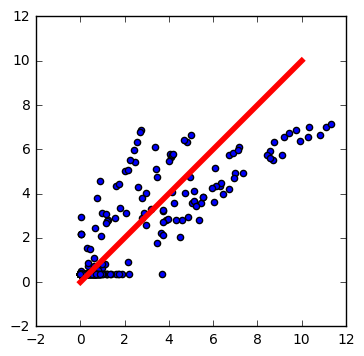

In [62]:
#Neural Network
mlp = MLPRegressor(hidden_layer_sizes=(1,), activation='relu', solver='adam', alpha=0.0001, max_iter=2000, random_state=None)
mlp.fit(X_train,y_train)
plt.figure(figsize=(4,4))
plt.scatter(y_test.values.astype(np.float),mlp.predict(X_test))
plt.plot([0,10],[0,10],lw=4,color='red')


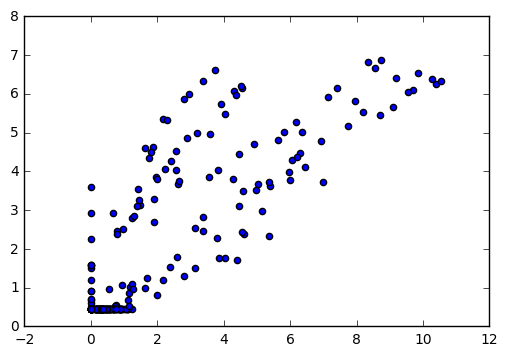

In [46]:
plt.scatter(y_test.values.astype(np.float),mlp.predict(X_test))

In [23]:
type(y_test.values)

numpy.ndarray

In [22]:
type(np.random.rand(10))

numpy.ndarray

In [24]:
type(mlp.predict(X_test))

numpy.ndarray

In [63]:
np.mean(y_test.values.astype(np.float))

2.0711183418972334